<a href="https://colab.research.google.com/github/karinefonseca/machine_learning_python_R/blob/main/Single_Layer_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

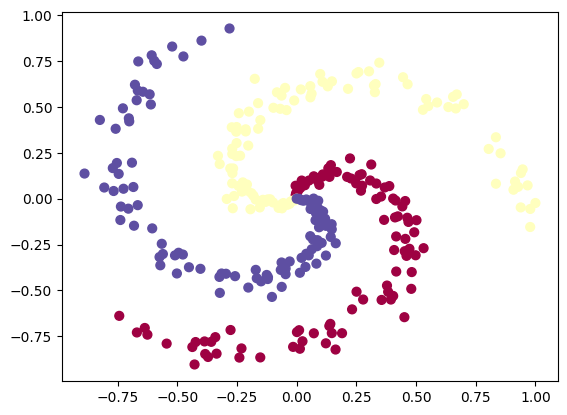

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do conjunto de dados
N = 100  # número de pontos por classe
D = 2  # dimensionalidade
K = 3  # número de classes
X = np.zeros((N*K, D))  # matriz de dados (cada linha = um exemplo)
y = np.zeros(N*K, dtype='uint8')  # rótulos de classe

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # raio
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N) * 0.2  # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# Visualização dos dados
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


Iteração 0: perda 1.0993727676534772
Iteração 10: perda 0.910931604190789
Iteração 20: perda 0.8405169170236522
Iteração 30: perda 0.8082996654271987
Iteração 40: perda 0.7914477691135685
Iteração 50: perda 0.7818297298822121
Iteração 60: perda 0.7760036590116145
Iteração 70: perda 0.7723213356485766
Iteração 80: perda 0.769919530918247
Iteração 90: perda 0.7683149086830077
Iteração 100: perda 0.7672226382526512
Iteração 110: perda 0.7664680119504647
Iteração 120: perda 0.7659403946124015
Iteração 130: perda 0.7655678950518052
Iteração 140: perda 0.7653028023794267
Iteração 150: perda 0.7651128971681092
Iteração 160: perda 0.7649761043882666
Iteração 170: perda 0.7648771153223594
Iteração 180: perda 0.7648052051274691
Iteração 190: perda 0.7647527955875604


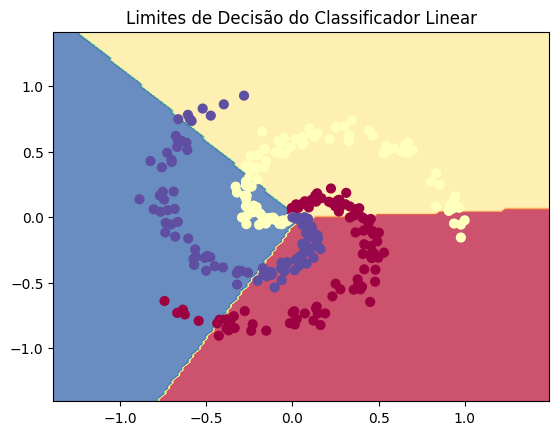

In [ ]:
# Inicialização dos parâmetros
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

# Hiperparâmetros
step_size = 1e-0
reg = 1e-3  # força de regularização

# Loop de descida de gradiente
num_examples = X.shape[0]
for i in range(200):

    # Avaliação das pontuações de classe
    scores = np.dot(X, W) + b

    # Cálculo das probabilidades de classe
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Cálculo da perda: média da perda de entropia cruzada e regularização
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print(f"Iteração {i}: perda {loss}")

    # Gradiente das pontuações
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # Retropropagação do gradiente nos parâmetros W e b
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
    dW += reg * W  # gradiente de regularização

    # Atualização dos parâmetros
    W += -step_size * dW
    b += -step_size * db

# Visualizar os limites de decisão para o classificador linear
h = 0.02  # passo no mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Limites de Decisão do Classificador Linear")
plt.show()


In [ ]:
# Avaliação da acurácia no conjunto de treinamento para o classificador Softmax
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print("Acurácia de treinamento: {:.2f}%".format(np.mean(predicted_class == y) * 100))

Acurácia de treinamento: 52.33%


Iteração 0: perda 1.0983865505413684
Iteração 1000: perda 0.3161745022161294
Iteração 2000: perda 0.2869366109932661
Iteração 3000: perda 0.2660060604480877
Iteração 4000: perda 0.2630907902500005
Iteração 5000: perda 0.2549117823019993
Iteração 6000: perda 0.253957723488457
Iteração 7000: perda 0.2507962820096679
Iteração 8000: perda 0.25049222785356784
Iteração 9000: perda 0.24932192630481737


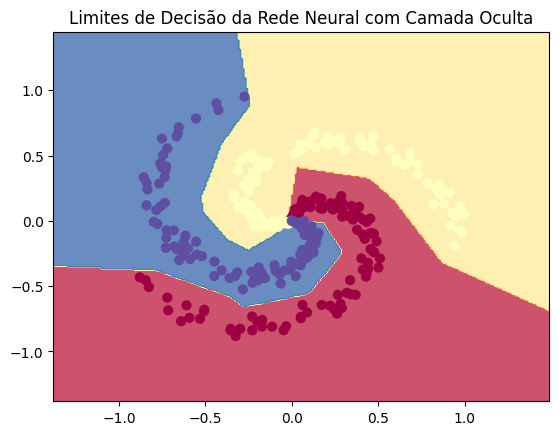

In [ ]:
# Inicialização dos parâmetros para a rede com camada oculta
h = 100  # tamanho da camada oculta
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# Hiperparâmetros
step_size = 1e-0
reg = 1e-3  # força de regularização

# Loop de descida de gradiente
for i in range(10000):

    # Avaliação das pontuações de classe com a rede de 2 camadas
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # ReLU
    scores = np.dot(hidden_layer, W2) + b2

    # Cálculo das probabilidades de classe
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Cálculo da perda: média da perda de entropia cruzada e regularização
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print(f"Iteração {i}: perda {loss}")

    # Gradiente das pontuações
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # Retropropagação do gradiente para W2 e b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    # Retropropagação para a camada oculta
    dhidden = np.dot(dscores, W2.T)
    dhidden[hidden_layer <= 0] = 0

    # Retropropagação para W e b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # Adição do gradiente de regularização
    dW2 += reg * W2
    dW += reg * W

    # Atualização dos parâmetros
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

# Visualizar os limites de decisão para a rede neural com camada oculta
h = 0.01  # ajuste do passo no mesh para garantir mais pontos
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Propagação direta na rede para cada ponto da malha
Z = np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b)  # ativação ReLU na camada oculta
Z = np.dot(Z, W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

# Plot dos limites de decisão
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Limites de Decisão da Rede Neural com Camada Oculta")
plt.show()

In [ ]:
# Avaliação da acurácia no conjunto de treinamento
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(f"Acurácia de treinamento: {np.mean(predicted_class == y) * 100:.2f}%")

Acurácia de treinamento: 98.33%
